# Atividade ponderada - Competição de modelo preditivo

## Limpeza de Dados:

#### Colunas da Base de Dados

- track_id: O ID único de cada música

- artists: Nome dos(as) artistas que performaram a música, separados por ';'

- album_name: Nome do álbum no qual aparece a música

- track_name: Nome da música

- duration_ms: A duração da música em milissegundos

- explicit: Boolean indicando se a música possui conteúdo explícito

- danceability: Descreve quanto uma música é "dançante" (0.0 = menos dançante, 1.0 = mais dançante)

- energy: Representa a intensidade e atividade de uma música (0.0 = baixa energia, 1.0 = alta energia)

- key: A tonalidade musical da faixa mapeada usando a notação padrão de Classe de Altura (12 notas musicais)

- loudness: Nível geral de volume da faixa em decibéis (dB)

- mode: Indica a modalidade (maior ou menor) da faixa

- speechiness: Detecta a presença de palavras faladas na faixa

- acousticness: Medida de confiança sobre se a faixa é acústica (0,0 = não acústica, 1,0 = altamente acústica)

- instrumentalness: Prediz se uma faixa contém vocais (0,0 = contém vocais, 1,0 = instrumental)

- liveness: Detecta a presença de uma audiência na gravação (0,0 = gravação em estúdio, 1,0 = performance ao vivo)

- valence: Mede a positividade musical transmitida por uma faixa (0,0 = negativa, 1,0 = positiva)

- tempo: Tempo estimado da faixa em batidas por minuto (BPM)

- time_signature: Assinatura de tempo estimada da faixa (de 3 a 7)

- track_genre: O gênero da música

- popularity_target: Boolean indicando se a música é popular ou não

#### Visualização Incial dos Dados

- Importando as bibliotecas:

In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

- Leitura inicial dos dados

In [573]:
df = pd.read_csv('train.csv')

- Primeira visualização dos dados

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [575]:
df.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [576]:
df.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


#### Diferenciação de colunas numéricas e categóricas:

In [577]:
todas_colunas = df.columns

colunas_categoricas = []
colunas_numericas = []

for el in todas_colunas:
    data_type = df[el].dtype

    # Check for numeric types (integers, floats, etc.)
    if pd.api.types.is_numeric_dtype(df[el]):
        colunas_numericas.append(el)
    
    # Check for categorical types (boolean, object, etc.)
    if pd.api.types.is_object_dtype(df[el]) or pd.api.types.is_bool_dtype(df[el]):
        colunas_categoricas.append(el)

print(f'Colunas Numéricas: {colunas_numericas}')
print(f'Colunas Categóricas: {colunas_categoricas}')


Colunas Numéricas: ['track_unique_id', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity_target']
Colunas Categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']


&ensp;Após segmentar as colunas entre categóricas e numéricas, percebe-se que existem 15 colunas numéricas, e que, dentre elas, 13 representam características presentes na música em termos numércos, e as outras duas são o ID identificador da música e se ela é popular ou não. Dentre as 13, uma se destaca por apresentar um valor booleanos, que é a coluna 'explicit'. Essa coluna representa a presença de conteúdo explícito ou não, o altoritimo de ML não é capaz de computar esses valores por isso é preciso mudar para um valor numérico, assim como a coluna 'mode' que apenas apresenta 0 e 1.

In [578]:
df['explicit'] = df['explicit'].astype('int')
df['explicit'].value_counts()

explicit
0    72962
1     6838
Name: count, dtype: int64

&ensp;Além delas, a coluna 'key' apresenta valores inteiros em um intervalo de [0, 11], da mesma forma que a coluna 'time_signature' que tem como intervalo [0, 5], sendo assim uma coluna considerada categórica, apsesar de ter sido alocada como numérica em função do tipo dos seus valores. 

In [579]:
valores_key = df['key'].value_counts()
valores_time_signature = df['time_signature'].value_counts()

valores_key, valores_time_signature

(key
 7     9261
 0     9183
 2     8120
 9     7893
 1     7531
 5     6549
 11    6529
 4     6340
 6     5560
 10    5233
 8     5090
 3     2511
 Name: count, dtype: int64,
 time_signature
 4    71202
 3     6512
 5     1274
 1      710
 0      102
 Name: count, dtype: int64)

&ensp;Além disso, a coluna 'track_unique_id' deveria ser considerada categótica uma vez que ela é um valor de identificação da música e não apresenta significado relevante para o _target_.

#### Matriz de Correlação

&ensp;A matriz tem como objetivo representar a correlação entre as variáveis numéricas apresentadas, os valores negativos mostram que as variáveis são inversamente prorporcionais e os valores positivos representam uma relação diretamente proporcional.

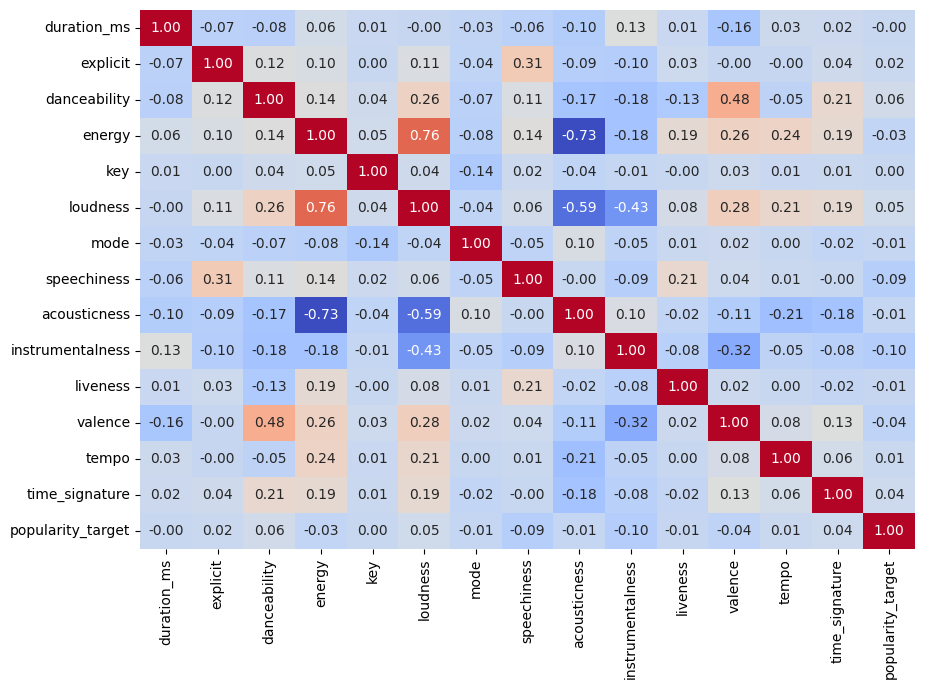

In [581]:
corr = df[colunas_numericas].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.show()

#### Desenvolvimento de gráficos

Observando e interpretando essa matriz de correlação, pode-se desenvolver alguns gráficos para terntar representar visualmente essas relações.

In [615]:
from scipy import stats

- Acousticness X Energy

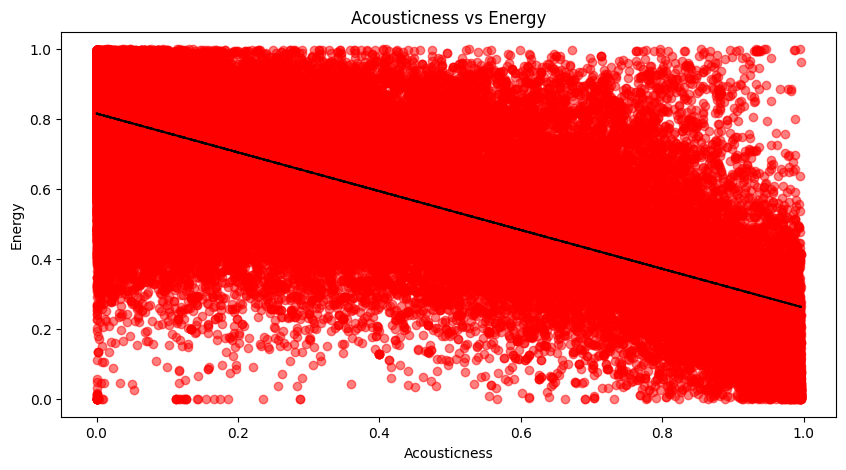

In [617]:
plt.figure(figsize=(10, 5))
plt.scatter(df['acousticness'], df['energy'], c='r', alpha=0.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['acousticness'], df['energy'])
plt.plot(df['acousticness'], slope*df['acousticness'] + intercept, 'k--')

plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Acousticness vs Energy')
plt.show()

- Loudness X Energy

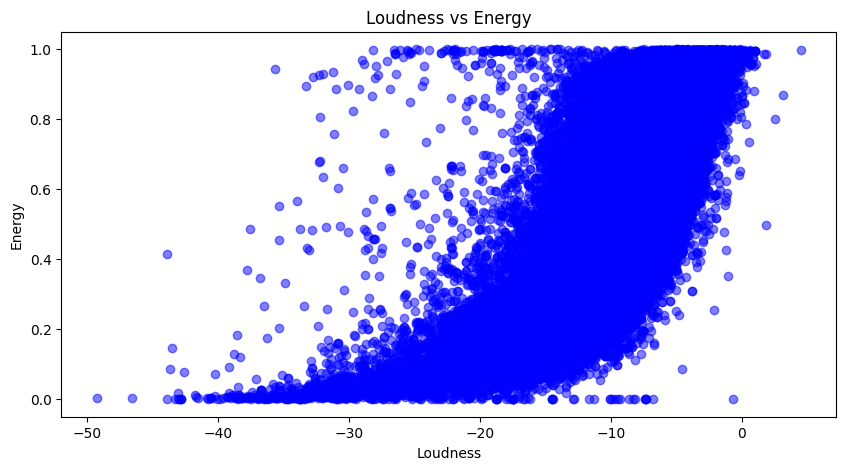

In [626]:
plt.figure(figsize=(10, 5))
plt.scatter(df['loudness'], df['energy'], c='b', alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy')
plt.show()

- Danceability X Valence

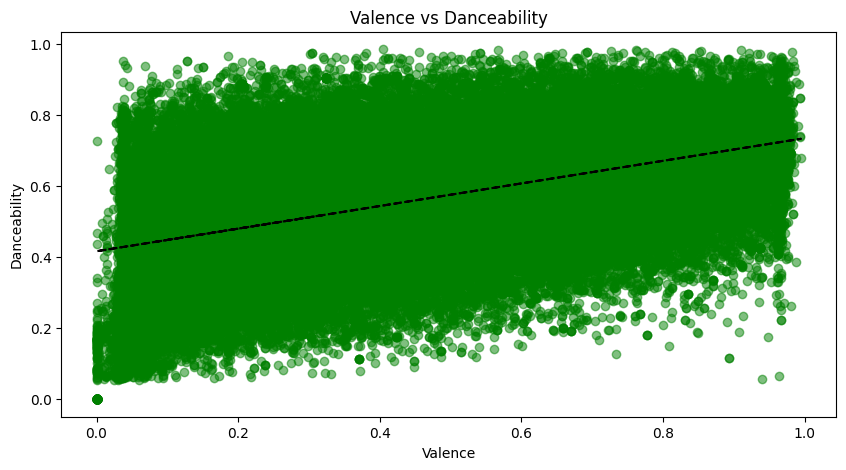

In [630]:
plt.figure(figsize=(10, 5))
plt.scatter(df['valence'], df['danceability'], c='g', alpha=0.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['valence'], df['danceability'])
plt.plot(df['valence'], slope*df['valence'] + intercept, 'k--')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.title('Valence vs Danceability')
plt.show()

- Acousticness X Loudness

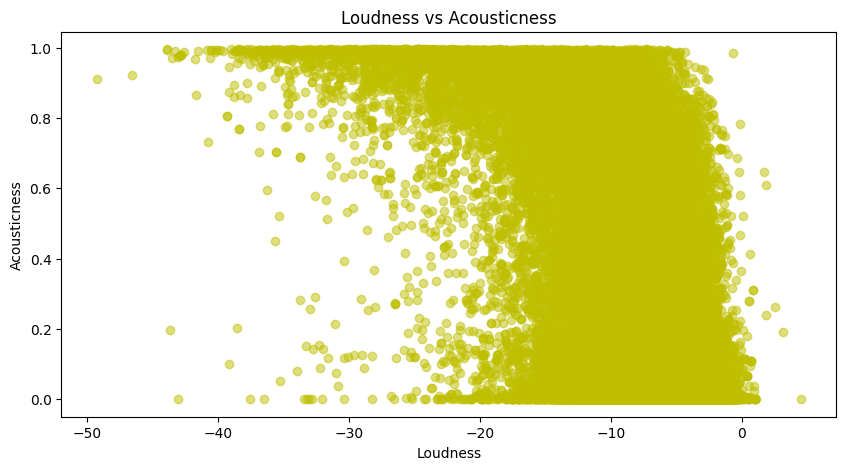

In [633]:
plt.figure(figsize=(10, 5))
plt.scatter(df['loudness'], df['acousticness'], c='y', alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.title('Loudness vs Acousticness')
plt.show()

#### Hipóteses

Observando os gráficos desenvolvidos anteriormente, eu desenvolvi algumas hipóteses relacionadas a essas relações entre variáveis.

##### Hipótese 01: Relação de 'Loudness' e 'Acousticness'

Dentre as músicas, a grande maioria está disposta em uma escala sonora de -20db a 0, e por isso, analisar o gráfico de Loudness X Acousticness, é fácil de perceber que a maioria dos valores estão nessa faixa. Apesar disso, quando as músicas ultrapassam o valor de 0.8 de Acousticness e quanto mais se aproximam de 1 maior é a quantidade de músicas que tem valor sonoro cada vez mais baixo, mostrando uma tendência que músicas focadas na parte acústica podem apresentar valores bem variados de altura de som, podendo chegar a valores abaixo de -40db. 

##### Hipótese 02: Relação de Loudness e Energy

Existe uma relação entre Loudness e Energy, onde à medida que a Loudness aumenta, a Energy do sinal tende a aumentar até certo ponto. No entanto, há um limite na parte superior de Energy em torno de 1, onde o aumento de Loudness não resulta em um aumento da Energy. logo, faixas de áudio mais altas também são provavelmente mais energéticas, mas há um limite na quantidade de energia que uma faixa pode conter, independentemente do volume.

##### Hipótese 03: Valence e Danceability

Existe uma leve correlação linear positiva entre o nível de positividade emocional de uma música e o quão dançável ela é. Músicas que transmitem emoções mais positivas tendem a ser ligeiramente mais dançáveis. No entanto, a fraca correlação indica que há muitas músicas "dançantes" que não necessariamente transmitem uma emoção positiva, e vice-versa. O que seria algo natural de pensar, ao visualizar os dados, existe, mas não com tanta correlação quanto o esperado. Outros fatores podem influenciar mais fortemente a dançabilidade de uma música do que apenas a positividade.

#### Valores ausentes/duplicados

- Busca por valores ausentes:

In [582]:
isna = df.isna().isnull().sum()
isna[isna > 0]

Series([], dtype: int64)

&ensp;Como resultado, não existem valores ausentes na base de dados de treinamento.

- Busca por valores duplicados

In [583]:
duplicatas = df.duplicated().sum()
duplicatas

np.int64(0)

&ensp;Não existem valores duplicados no Data Frame.

#### Análise de Outliers

- Colunas já padronizadas

&ensp;Das 12 variáveis numéricas que usam valores quantitativos para representar características da música, 7 o fazem apresentando um intervalo de 0 a 1, logo, já estão padronizadas e podem ser aplicadas no modelo preditivo. 

&ensp;Ainda assim, podem possuir a presença de _outliers_. Por isso, dentre elas, eu observei algumas que apresentam valores de média muito diferentes de 0.5 (caso os dados fossem dispostos de forma homogênea essa seria a média) e principalmente, valores mais altos no último quartil, elas são: 'acousticness', 'instrumentalness' e 'liveness'.

&ensp;Eu decidi seguir por uma interpretação gráfica dos _outliers_, fazendo gráficos de _boxplot_, para identificar esses valores. Vale ressaltar que, apesar desses gráficos do Matplotlib já utilizarem um método de reconhecimento de _outliers_, que é o IQF, e que de acordo com o mesmo tudo que estiver fora dos limites superiores e inferiores do gráfico são considerados pontos anômalos, eu optei por me ater a uma análise gráfica para decidir se o ponto será considerado um _outlier_ ou não.

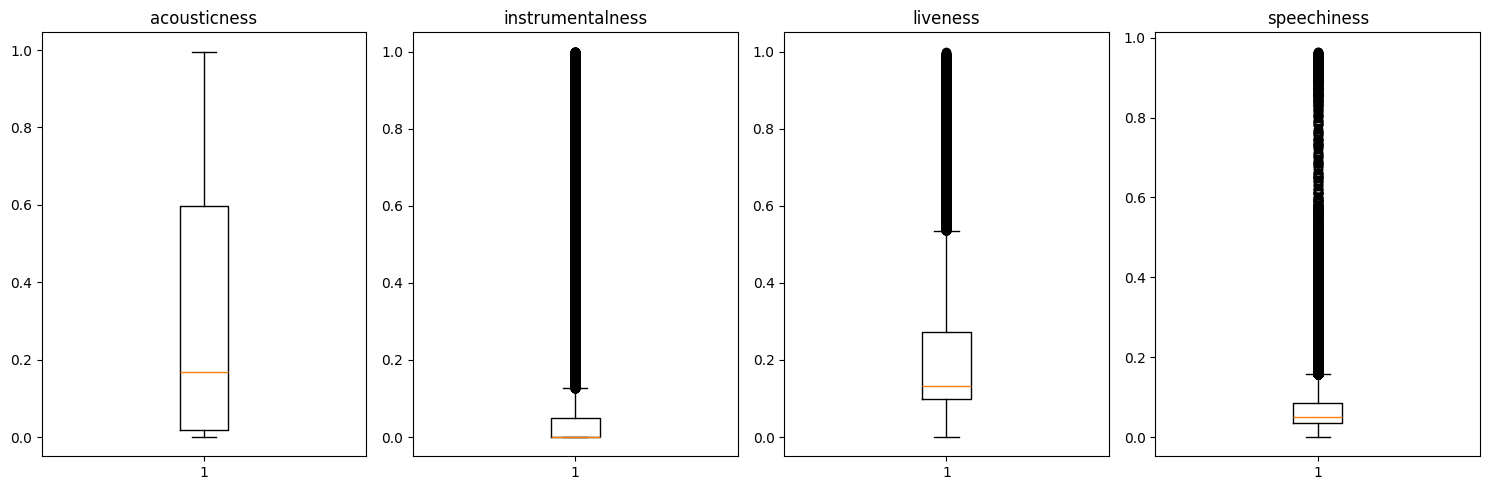

In [584]:
colunas_padronizadas = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']

plt.figure(figsize=(15, 5))
for i, col in enumerate(colunas_padronizadas, 1):
    plt.subplot(1, 4, i)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

&ensp;Analisando os gráficos, pode-se inferir que a coluna 'acousticness' não possui _outliers_, diferentemente das outras duas colunas que apresentaram diversos valores que ficaram fora dos limites superiores do boxplot. Tais valores tem grande ocorrência, por isso formam no gráfico uma linha contínua de pontos. De acordo com o método IQR eles são considerados _outliers_, mas não necessariamente precisam ser retirados, pois apresentam uma grande recorrência e podem contribuir no treinamento do modelo, diminuindo seu viés.

- Colunas sem intervalo definido

&ensp;Em seguida, as outras 3 são as colunas: 'duration_ms', 'loudness' e 'tempo'. Sob elas, farei uma análise profunda em busca de possíveis dados que possam atrapalhar o treinamento do modelo preditivo. Uma vez que elas, diferentemente das outras não estão padronizadas. 

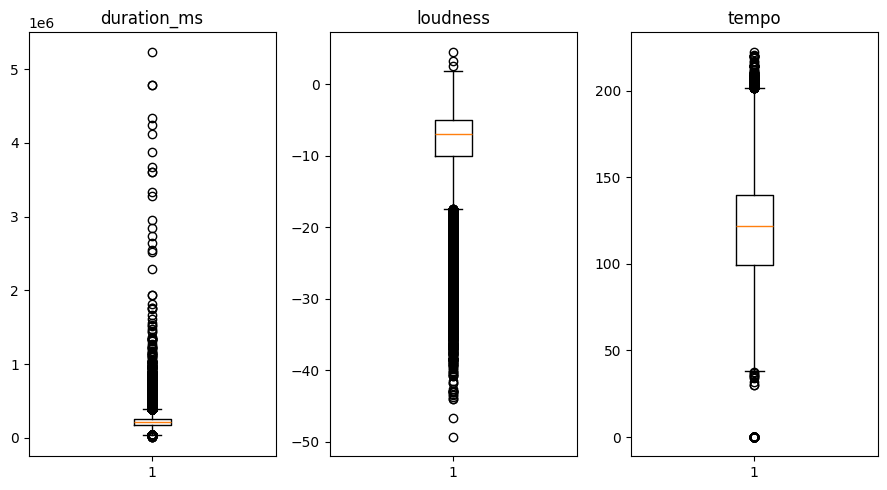

In [585]:
colunas_sem_intervalo = ['duration_ms', 'loudness', 'tempo']

plt.figure(figsize=(15, 5))
for i, col in enumerate(colunas_sem_intervalo, 1):
    plt.subplot(1, 5, i)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

&ensp;Dentre as três variáveis, eu decidi tratar os valores considerados _outliers_ de duas ocasiões. Primeiramente, os valores maiores do que 2 da coluna 'duration_ms', uma vez que a partir deles não existe mais uma continuidade e constância nos dados. 

&ensp;Ademais, a coluna 'tempo' possui alguns valores proximos a 0 e completemente desconexos de outros, por isso, vou considera-los _outliers_, já que podem atrapalhar no treinamento do modelo.  

In [586]:
df = df.drop(df.loc[(df['duration_ms'] > 2000000) & (df['tempo'] < 10)].index)

#### Codificação de variáveis categóricas

&ensp;Dentre as colunas acima, 'explicit', 'mode', 'key' e 'time_signature' não serão codificadas, pois já representam valores inteiros contidos em um intervalo definido. Em relação as outras, eu defini que as colunas 'track_genre', 'album_name' e 'artists' devem ser codificadas, pois, de acordo com meu julgamento, podem influenciar diretamente na popularidade da música, e por isso serão aplicadas futuramente no modelo preditivo.  

- Coluna gênero

Para essa coluna eu desenvolvi um cáculo que expressa a probabilidade de um artista desenvolver uma música famosa, uma vez que apenas codificar essas variáveis não expressaria a importância do artista para a fama da música.

In [698]:
genre_map = {}
for index, row in df.iterrows():
    if row['track_genre'] not in genre_map:
        genre_map[row['track_genre']] = {
            'count': 1,
            'popularity': row['popularity_target']
        }
    else:
        genre_map[row['track_genre']]['count'] += 1
        genre_map[row['track_genre']]['popularity'] += row['popularity_target']

genre_df = pd.DataFrame(genre_map).T
genre_df['popularity'] = genre_df['popularity'] / genre_df['count']
for index, row in df.iterrows():
    df.at[index, 'genre_popularity'] = genre_df.loc[row['track_genre']]['popularity']

- Coluna artistas

Para essa coluna eu desenvolvi um cáculo que expressa a probabilidade de um artista desenvolver uma música famosa, uma vez que apenas codificar essas variáveis não expressaria a importância do artista para a fama da música. Em função das múscias com mais um artista, deve-se efetuar esse cálculo para levar em consideração esse aumento da probabilidade da música ser famosa, já que diferentes artistas podem cativar diferentes pessoas para a mesma música. 

In [700]:
artists_map = {}
for index, row in df.iterrows():
    artists_split = row['artists'].split(';')
    for artist in artists_split:
        if artist not in artists_map:
            artists_map[artist] = {
                'count': 1,
                'popularity': row['popularity_target']
            }
        else:
            artists_map[artist]['count'] += 1
            artists_map[artist]['popularity'] += row['popularity_target']

artists_df = pd.DataFrame(artists_map).T
artists_df['popularity'] = artists_df['popularity'] / artists_df['count']
for index, row in df.iterrows():
    artists_split = row['artists'].split(';')
    popularity = 0
    for artist in artists_split:
        popularity += artists_df.loc[artist]['popularity']
    df.at[index, 'artists_popularity'] = popularity

- Coluna Album

Para essa coluna eu desenvolvi um cáculo que expressa a probabilidade de um album conter uma música famosa, uma vez que apenas codificar essas variáveis não expressaria a importância do album para a fama da música. Muitas vezes um album famoso atrai atenção para todas as músicas do album, algo que pode afetar a popularidade delas.

In [701]:
album_map = {}
for index, row in df.iterrows():
    if row['album_name'] not in album_map:
        album_map[row['album_name']] = {
            'count': 1,
            'popularity': row['popularity_target']
        }
    else:
        album_map[row['album_name']]['count'] += 1
        album_map[row['album_name']]['popularity'] += row['popularity_target']

albums_df = pd.DataFrame(album_map).T
albums_df['popularity'] = albums_df['popularity'] / albums_df['count']
for index, row in df.iterrows():
    df.at[index, 'album_popularity'] = albums_df.loc[row['album_name']]['popularity']

#### Matriz de Correlação

&ensp;A matriz tem como objetivo representar a correlação entre as variáveis numéricas apresentadas, os valores negativos mostram que as variáveis são inversamente prorporcionais e os valores positivos representam uma relação diretamente proporcional.

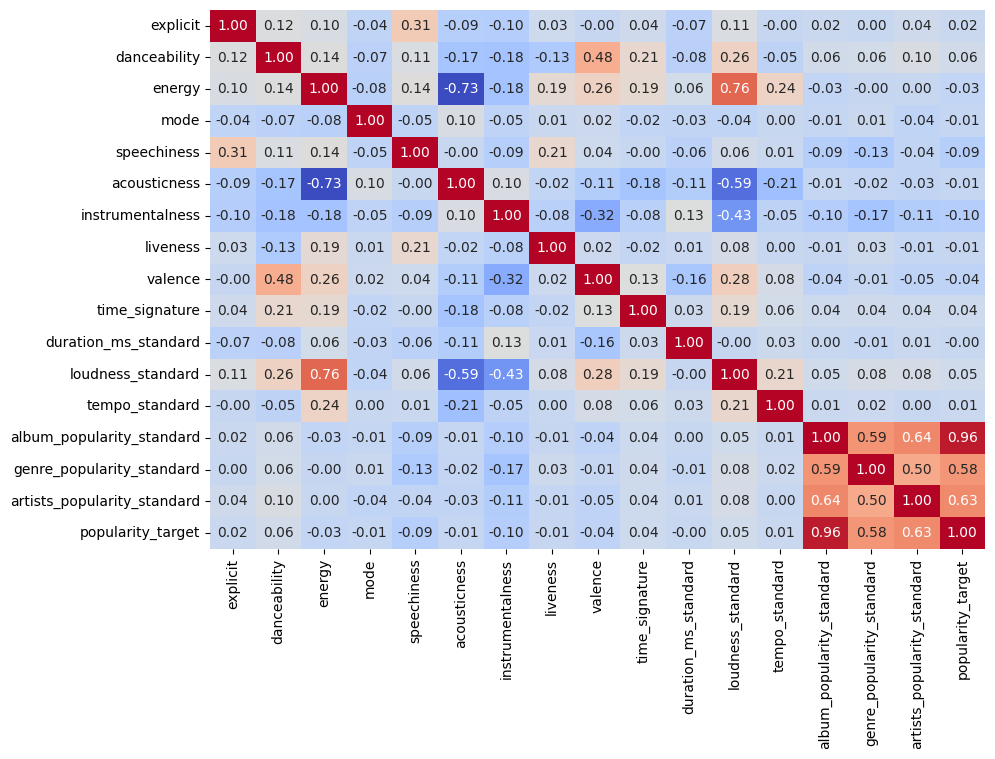

In [803]:
colunas_numericas.append('popularity_target')
corr = df[colunas_numericas].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.show()

Pode-se ver que algumas variáveis, como 'key' e 'duration_ms' não possuem correlação alguma com 'popularity_target'.

E que as colunas criadas de popularidade, a partir de album, artista e gênero são as que tem maior correlação com a coluna _target_.

#### Normalização de variáveis numéricas

&ensp;Dentre as variáveis numéricas, diversas delas já estão normalizadas, representadas em intervalos entre 0 e 1. Apesar disso, tem algumas colunas que possuem valores muito discrepantes em relação a outras e por isso é preciso fazer uma normalização dessas colunas em específico, uma vez que essa discrepância pode afetar o modelo preditivo.

&ensp;As varáveis numéricas que serão normalizadas são: 'duration_ms', 'loudness' e 'tempo'.

In [737]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['duration_ms_standard', 'loudness_standard', 'tempo_standard', 'album_popularity_standard', 'genre_popularity_standard', 'artists_popularity_standard']] = scaler.fit_transform(df[['duration_ms', 'loudness', 'tempo', 'album_popularity', 'genre_popularity', 'artists_popularity']])

colunas_standard = ['duration_ms_standard', 'loudness_standard', 'tempo_standard', 'album_popularity_standard', 'genre_popularity_standard', 'artists_popularity_standard']


#### Seleção das Features 

&ensp;Agora, é o momento de finalizar a decisão de quais colunas numéricas serão utilizadas no modelo. É importante entender quais são as variáveis que tem correlação com a coluna target, algo que pode ser entendido ao interpretar a matriz de correlação e analisar quais características de uma música podem realmente afetar sua popularidade. 

In [686]:
df.columns

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'popularity_target', 'track_genre_encoded', 'artistas_encoded',
       'duration_ms_standard', 'loudness_standard', 'tempo_standard',
       'artists_popularity', 'album_popularity', 'genre_popularity',
       'album_popularity_standard', 'genre_popularity_standard',
       'artists_popularity_standard'],
      dtype='object')

In [693]:
colunas_numericas = ['explicit', 'danceability', 'energy',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'time_signature',
       'duration_ms_standard', 'loudness_standard', 'tempo_standard',
       'album_popularity_standard', 'genre_popularity_standard',
       'artists_popularity_standard']

### Modelos Preditivos

#### Preparação do teste

In [738]:
df_teste = pd.read_csv('test.csv')

In [739]:

for index, row in df_teste.iterrows():
    # Update genre_popularity
    if row['track_genre'] not in genre_map:
        df_teste.at[index, 'genre_popularity'] = genre_df['popularity'].mean()
    else:
        df_teste.at[index, 'genre_popularity'] = genre_df.loc[row['track_genre']]['popularity']
    
    # Update album_popularity
    if row['album_name'] not in album_map:
        df_teste.at[index, 'album_popularity'] = albums_df['popularity'].mean()
    else:
        df_teste.at[index, 'album_popularity'] = albums_df.loc[row['album_name']]['popularity']
    
    # Update artists_popularity
    artists_split = str(row['artists']).split(';')
    popularity = 0
    for artist in artists_split:
        if artist not in artists_map:
            popularity += artists_df['popularity'].mean()
        else:
            popularity += artists_df.loc[artist]['popularity']
    df_teste.at[index, 'artists_popularity'] = popularity

df_teste[['duration_ms_standard', 'loudness_standard', 'tempo_standard', 'album_popularity_standard', 'genre_popularity_standard', 'artists_popularity_standard']] = scaler.transform(df_teste[['duration_ms', 'loudness', 'tempo', 'album_popularity', 'genre_popularity', 'artists_popularity']])

- Dividir os dados

In [740]:
from sklearn.model_selection import train_test_split

X = df[colunas_numericas]
y = df['popularity_target']
X_test = df_teste[colunas_numericas]


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#### KNN - K Nearest Neighbors

- Aplicar o KNN

In [741]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inicializar o KNeighborsClassifier com k = 2
knn = KNeighborsClassifier(n_neighbors=2)

# Ajustar o modelo nos dados de treino
knn.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = knn.predict(X_valid)

# Avaliar a acurácia
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.14%


- Tuning de Hiperparâmetros

In [742]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 15, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_valid, y_valid)

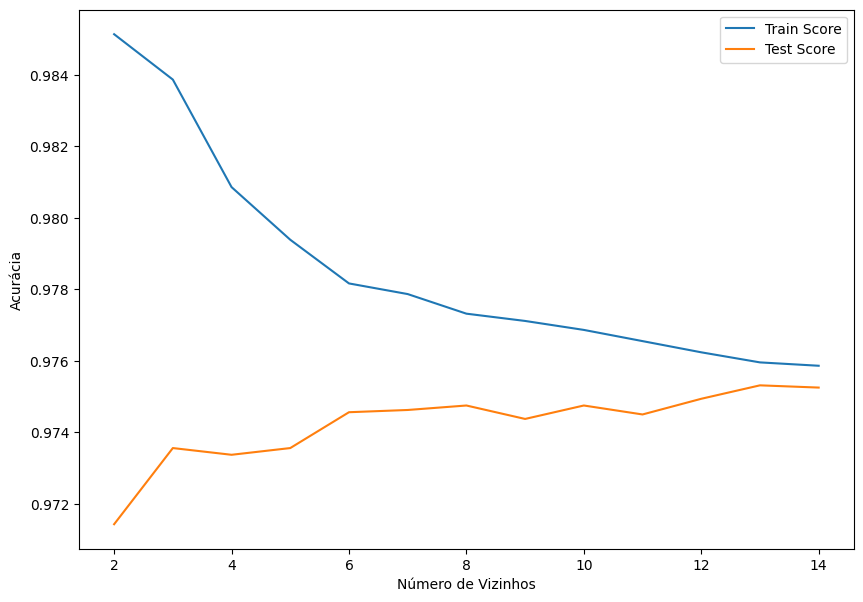

In [743]:
plt.figure(figsize=(10, 7))
plt.plot(list(train_score.keys()), list(train_score.values()), label='Train Score')
plt.plot(list(test_score.keys()), list(test_score.values()), label='Test Score')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [744]:
knn = KNeighborsClassifier(n_neighbors=14)

# Ajustar o modelo nos dados de treino
knn.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = knn.predict(X_valid)

# Avaliar a acurácia
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.53%


- Submissão

In [745]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X, y)

# Fazer previsões nos dados de teste
y_pred = knn.predict(X_test)

df_sample = pd.read_csv('sample_submission.csv')
df_submission_knn = df_sample.copy()
df_submission_knn['popularity_target'] = y_pred

df_submission_knn.to_csv('submission_knn2.csv', index=False)

Essa submissão teve como resultado: 0.879

#### Random Forest

- Aplicando o modelo

In [746]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.94%


- Tuning do modelo

In [749]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20],
              'random_state': [42]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Acurácia: {accuracy * 100:.2f}%")
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Acurácia: 97.96%
{'max_depth': 20, 'n_estimators': 400, 'random_state': 42}
0.9796049296899376
RandomForestClassifier(max_depth=20, n_estimators=400, random_state=42)


&ensp;O modelo Random Forest, dará como resultado do Grid Search os valores mais altos, pois se adaptará ao conjunto de dados. Apesar disso, não necessáriamente deve-se aplicar esses valores, pois pode gerar um _overfitting_ no modelo.

In [806]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.91%


- Submissão

In [807]:
rf.fit(X, y)
y_pred = rf.predict(X_test)

df_submission_rf = df_sample.copy()
df_submission_rf['popularity_target'] = y_pred

df_submission_rf.to_csv('submission_rf3.csv', index=False)

#### SVM - Supporting Vector Machine

- Aplicando o Modelo:

In [751]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.62%


- Tuning

In [759]:
grid_search = GridSearchCV(estimator=svc, param_grid={'C': [0.1], 'kernel': ['linear'], 'random_state': [42]}, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Acurácia: {accuracy * 100:.2f}%")
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Acurácia: 97.56%
{'C': 0.1, 'kernel': 'linear', 'random_state': 42}
0.9746393098682606
SVC(C=0.1, kernel='linear', random_state=42)


- O modelo não foi nada proeficiente com esse conjunto de dados.

#### GradientBoostingClassifier

- Aplicando o modelo:

In [783]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.73%


In [639]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 82.09%


- Tuning

In [ ]:

param_grid = {'n_estimators': [100, 200],
              'learning_rate': [0.1, 1],
              'max_depth': [10],
              'random_state': [42]}
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Acurácia: {accuracy * 100:.2f}%")
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

- Submissão:

In [808]:
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
gb.fit(X, y)
y_pred = gb.predict(X_test)

df_sample = pd.read_csv('sample_submission.csv')
df_submission_gbc = df_sample.copy()
df_submission_gbc['popularity_target'] = y_pred

df_submission_gbc.to_csv('submission_gbc2.csv', index=False)

Essa submissão teve como resultado: 0.79800

#### Linear Regression

- Aplicação do Modelo

In [755]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 97.54%


- Tuning

In [777]:
grid_search = GridSearchCV(estimator=lr, param_grid={'C': [0.001], 'random_state': [42]}, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)

print(f"Acurácia: {accuracy * 100:.2f}%")
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Acurácia: 97.49%
{'C': 0.001, 'random_state': 42}
0.9736211188304894
LogisticRegression(C=0.001, random_state=42)


#### Ensamble entre Grandient Boost e Random Forest

##### Aplicando modelo com Voting 

- Voting Soft

In [782]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=5, learning_rate=0.01, max_depth=5, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='soft')


voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 97.76%


- Voting Hard

In [779]:
rf = RandomForestClassifier(n_estimators=400, random_state=42)
gb = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=16, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='hard')


voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 98.00%


In [781]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=5, learning_rate=0.01, max_depth=5, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='hard')


voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 97.36%


- Submissão:

 Voting Soft

In [635]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='soft')

voting_clf.fit(X, y)
y_pred = voting_clf.predict(X_test)

df_sample = pd.read_csv('sample_submission.csv')
df_submission_voting = df_sample.copy()
df_submission_voting['popularity_target'] = y_pred

df_submission_voting.to_csv('submission_voting.csv', index=False)

Voting Hard

In [805]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='hard')

voting_clf.fit(X, y)
y_pred = voting_clf.predict(X_test)

df_sample = pd.read_csv('sample_submission.csv')
df_submission_voting = df_sample.copy()
df_submission_voting['popularity_target'] = y_pred

df_submission_voting.to_csv('submission_voting.csv', index=False)

A submissão deu: 0.81922

##### Aplicando modelo com Stacking

- Meta-Modelo = Logistic Regression

- Primeira camada: Gradient, Random Forest e SVC

In [778]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=16, random_state=42)
svc = SVC(C=0.1, kernel='linear', random_state=42)

estimators = [
    ('rf', rf),
    ('gb', gb),
    ('svc', svc)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 97.77%


- Meta-Modelo = KNN

In [800]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
svc = SVC(C=0.1, kernel='linear', random_state=42)

# Meta-modelo
knn = KNeighborsClassifier(n_neighbors=14)

# Stacking
stacking_clf = StackingClassifier(
    estimators=[('gb', gb), ('rf', rf)],  # Modelos de primeiro nível
    final_estimator=knn  # Meta-modelo (nível 2)
)

# Treinar o modelo
stacking_clf.fit(X_train, y_train)

# Fazer previsões
y_pred = stacking_clf.predict(X_valid)

# Avaliar o modelo
accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia do modelo de Stacking: {accuracy * 100:.2f}%')

Acurácia do modelo de Stacking: 97.74%


#### Validação Cruzada

A validação cruzada (cross-validation) é uma técnica fundamental em machine learning para avaliar o desempenho de um modelo de forma mais robusta e confiável. Ela ajuda a garantir que o modelo que você está treinando generalize bem para novos dados, em vez de apenas ajustar-se aos dados de treinamento, evitando problemas de overfitting, algo recorrente nesse conjunto de dados em específico.

Por isso, vou aplicar meus melhores modelos aqui, com objetivo de definir quais serão entregues para a competição.

##### Rodar primeiramente em cada modelo individualmente.

In [791]:
from sklearn.model_selection import cross_val_score

X, y = df[colunas_numericas], df['popularity_target']

# Definir os modelos
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
svc = SVC(C=0.1, kernel='linear', random_state=42)
knn = KNeighborsClassifier(n_neighbors=14)
lr = LogisticRegression(random_state=42)



# Aplicar Cross-Validation com K-Fold (K=5)
rf_scores = cross_val_score(rf, X, y, cv=10)  # Random Forest com 5-Fold Cross Validation
gb_scores = cross_val_score(gb, X, y, cv=10)  # Gradient Boosting com 5-Fold Cross Validation
svc_scores = cross_val_score(svc, X, y, cv=10)  # SVM com 5-Fold Cross Validation
knn_scores = cross_val_score(knn, X, y, cv=10)  # KNN com 5-Fold Cross Validation
lr_scores = cross_val_score(lr, X, y, cv=10)  # Logistic Regression com 5-Fold Cross Validation


# Exibir a média e o desvio padrão das acurácias para cada modelo
print(f'Random Forest - Mean Accuracy: {rf_scores.mean():.4f}, Std: {rf_scores.std():.4f}')
print(f'Gradient Boosting - Mean Accuracy: {gb_scores.mean():.4f}, Std: {gb_scores.std():.4f}')
print(f'SVM - Mean Accuracy: {svc_scores.mean():.4f}, Std: {svc_scores.std():.4f}')
print(f'KNN - Mean Accuracy: {knn_scores.mean():.4f}, Std: {knn_scores.std():.4f}')
print(f'Logistic Regression - Mean Accuracy: {lr_scores.mean():.4f}, Std: {lr_scores.std():.4f}')


Random Forest - Mean Accuracy: 0.9742, Std: 0.0044
Gradient Boosting - Mean Accuracy: 0.9768, Std: 0.0014
SVM - Mean Accuracy: 0.9751, Std: 0.0015
KNN - Mean Accuracy: 0.9739, Std: 0.0008
Logistic Regression - Mean Accuracy: 0.9743, Std: 0.0012


##### Testar em modelos de Voting

In [790]:
X, y = df[colunas_numericas], df['popularity_target']

rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)

voting_clf_hard = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='hard')

voting_clf_soft = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb)], voting='soft')


voting_hard_score = cross_val_score(voting_clf, X, y, cv=10)
voting_soft_score = cross_val_score(voting_clf, X, y, cv=10)

print(f'Voting Hard - Mean Accuracy: {voting_hard_score.mean():.4f}, Std: {voting_hard_score.std():.4f}')
print(f'Voting Soft - Mean Accuracy: {voting_soft_score.mean():.4f}, Std: {voting_soft_score.std():.4f}')

Voting Hard - Mean Accuracy: 0.9770, Std: 0.0021
Voting Soft - Mean Accuracy: 0.9770, Std: 0.0021


##### Testar modelos em Stacking

In [792]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
svc = SVC(C=0.1, kernel='linear', random_state=42)

estimators = [
    ('rf', rf),
    ('gb', gb),
    ('svc', svc)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_score = cross_val_score(stacking_clf, X, y, cv=10)

print(f'Stacking - Mean Accuracy: {stacking_score.mean():.4f}, Std: {stacking_score.std():.4f}')

Stacking - Mean Accuracy: 0.9769, Std: 0.0012


### Modelo Final

Por fim, o modelo selecionado, já hiperparametrizado, foi o de Stacking, usando como meta-modelo a Regressão Linear, e em sua camada primária, os modelos: Gradient Boost, Random Forest e SVC. Uma vez que ao aplicar no csv de teste o Kaggle, foi ele que rendeu o maior valor de acurácia.
Segue o Modelo escolhido:

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
svc = SVC(C=0.1, kernel='linear', random_state=42)

estimators = [
    ('rf', rf),
    ('gb', gb),
    ('svc', svc)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 97.77%


- As métricas de avaliação do modelo: 

In [780]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8215
           1       0.98      0.98      0.98      7745

    accuracy                           0.98     15960
   macro avg       0.98      0.98      0.98     15960
weighted avg       0.98      0.98      0.98     15960



- Submissão

In [801]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=5, random_state=42)
svc = SVC(C=0.1, kernel='linear', random_state=42)

estimators = [
    ('rf', rf),
    ('gb', gb),
    ('svc', svc)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(X, y)

y_pred = stacking_clf.predict(X_test)

df_sample = pd.read_csv('sample_submission.csv')
df_submission_stacking = df_sample.copy()
df_submission_stacking['popularity_target'] = y_pred

df_submission_stacking.to_csv('submission_stacking.csv', index=False)